<a href="https://colab.research.google.com/github/GonzalezJulianBautista/Data-Science-Portfolio/blob/main/REGRESI%C3%93N_CON_DEEP_LEARNING_(PYTHON).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**REGRESIÓN CON DEEP LEARNING (PYTHON) - Ventas de propiedades ( (King County, EEUU) - Julián Bautista González**

**Contenido:** 

* Presentación
* Carga de datos 
* Interpretación de datos
* Análisis de datos: 
  * Sección 1: Visualizaciones Iniciales
  * Sección 2: Visualizaciones Geográficas
* Deep Learning: Creación del modelo 
* Deep Learning: Predicción de precios

## **PRESENTACIÓN**

Presentamos el proyecto, la metodología, el contexto y los objetivos.

* **Regresión con Keras (Python Deep Learning)**

A continuación, se realizarán todas las tareas de manipulación de datos correspondientes a un proyecto de Deep Learning sobre un dataset: **House Sales in King County, USA**. 

* **Fuente de los datos**

El dataset se extraerá directamente de un [Repositorio Github](https://raw.githubusercontent.com/bharathcan/House-Sales-in-King-County-USA/master/kc_house_data_NaN.csv) que contiene un archivo csv con los datos. 

* **Contenido**

El dataset, extraído en formato csv, contiene los precios de las propiedades vendidas en King County, incluyendo Seattle, EEUU. Contiene registros entre mayo de 2014 y mayo de 2015

* **Objetivo**

El objetivo del siguiente proyecto será realizar las tareas pertinentes a un proyecto de deep learning sobre los datos del dataset, a la vez que se plasma el desarrollo, segmento por segmento y de la forma más clara y concisa posible.
Esto lo haremos de dos maneras:

  * **desde el punto de vista técnico y práctico:** utilizando herramientas y librerías de explotación de datos importados directamente a Python.

  * **desde el punto de vista expositivo:** complementando las celdas de código con celdas de texto y comentarios a lo largo de todo el proceso, además de realizar la adecuada división en segmentos del notebook, para un mejor seguimiento de la metodología de trabajo. 

* **¿Por qué analizamos los datos?**

El objetivo de este trabajo será predecir los precios de las casas a través de un modelo de deep learning, utilizando Python y las librerías que pone a disposición de los científicos de datos. 

De esta forma, intentaremos generar un modelo eficiente y eficaz de predicción de precios a partir de características (features), que puede ser trasladado a otras áreas y rubros según se lo requiera. 



## **CARGA DE DATOS**

Extraemos los datos e importamos las librerías a utilizar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'darkgray', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bharathcan/House-Sales-in-King-County-USA/master/kc_house_data_NaN.csv', delimiter = ',' )

* df: DataFrame que contiene los registros de precios de propiedades vendidas en King County, EEUU, entre mayo de 2014 y mayo de 2015.

## **INTERPRETACIÓN DE DATOS**

Realizamos una interpretación de los datos y las transformaciones convenientes para el trabajo. 


Consultamos con el método .info un primer pantallazo del dataset. Vemos que contamos con aproximadamente 21613 entradas en 22 columnas. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

Revisamos con el método .head() cómo se ve nuestro DataFrame

In [4]:
df.head(15)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Podemos describir las variables de nuestro dataframe como: 

    
* id: ID único para cada casa vendida, int64
* date: Fecha de la venta, objeto
* price: Precio al que se vendió la propiedad, float64
* bedrooms: Número de habitaciones, float64
* bathrooms: Baños, float64
NOTA: El valor .5 equivale a un baño con toilette, pero sin ducha.
* sqft_living: Metros cuadrados de la propiedad (interior), int64
* sqft_lot: Metros cuadrados de la propiedad (lote), int64
* floors: Pisos, float64
* waterfront: Variable de 1 o 0 que referencia si la casa tiene frente al agua o no. 
* view: puntaje de 0 a 4 para la vista de la propiedad, int64.
* condition: puntaje de 1 a 5 para la condición de la propiedad, int64
* grade: puntaje de 1 a 13 para edificación, construcción y diseño, donde 1 a 3 es pobre, 4 a 10 es promedio y 11 a 13 es alto, int64
* sqft_above: Metros cuadrados sobre el nivel del suelo, int64
* sqft_basement: Metros cuadrados debajo del nivel del suelo, int64
* yr_built: Año en el que se construyó la propiedad, int64
* yr_renovated: año de la última renovación de la propiedad, int64
* zipcode: zipcode de la propiedad, int64
* lat: latitud, float64
* long: longitud, float64
* sqft_living15: metros cuadrados (interior) de los 15 vecinos más cercanos, int64
* sqft_lot15: metros cuadrados (lote) de los 15 vecinos más cercanos, int64

NOTA: La información complementaria que no se encuentra a simple vista en el dataframe, como por ejemplo, las categorías de los puntajes numéricos, se encuentra en el link del dataset ya enlazado. 

Una vez que estamos en contexto y sabemos con qué datos estamos trabajando, realizamos unas rápidas transformaciones que van a facilitarnos el trabajo más adelante. 

1. Revisamos los datos nulos que presenta el dataframe, y de haberlos, los eliminamos. 

In [5]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [6]:
df.dropna(inplace = True)

2. Realizamos todas las transformaciones pertinentes a las variables con fechas, además de preparar nuevas columnas al respecto. La columna 'date' será removida del dataframe, ya que no podrá ser procesada por el modelo. 

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['month'] = df['date'].apply(lambda date:date.month)

In [9]:
df['year'] = df['date'].apply(lambda date:date.year)

In [10]:
df = df.drop('date',axis=1)

3. Eliminamos la columna que contiene el zipcode de las propiedades: A la hora de trabajar con deep learning, el modelo interpretará un zipcode de '91239' como una variable contínua, y será preferible por ahora remover ese posible problema de la ecuación. 

In [11]:
df = df.drop('zipcode',axis=1)

4. Ya que nuestra variable de mayor interés es la de precio, y es esperable que existan extremos muy alejados de la media de distribución de los mismos, lo mejor será apartar a los extremos usando un segundo dataframe que lo excluya. 

In [12]:
df.sort_values('price',ascending=False).head(20)

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
7252,7252,6762700020,7700000.0,6.0,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,10,2014
3914,3914,9808700762,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449,6,2014
9254,9254,9208900037,6885000.0,6.0,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730,9,2014
4411,4411,2470100110,5570000.0,5.0,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345,8,2014
1448,1448,8907500070,5350000.0,5.0,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750,4,2015
1315,1315,7558700030,5300000.0,6.0,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619,4,2015
1164,1164,1247600105,5110800.0,5.0,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788,10,2014
8092,8092,1924059029,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,47.5570,-122.210,3270,10454,6,2014
2626,2626,7738500731,4500000.0,5.0,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,47.7493,-122.280,3030,23408,8,2014
8638,8638,3835500195,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592,6,2014


Los extremos son fáciles de ubicar, extraer el 1% de las propiedades con los precios más altos en un dataframe separado nos será de suficiente utilidad. 

Calculamos el 1% de las propiedades. 

In [13]:
len(df)*(0.01)

215.97

Creamos el nuevo dataframe que excluye los extremos. 

In [14]:
df_99 = df.sort_values('price',ascending=False).iloc[216:]

Habiendo realizado las transformaciones pertinentes, el dataset está listo para trabajar. 

## **ANÁLISIS DE DATOS**

Una vez listo el dataframe, explotamos los datos. 

### **SECCIÓN 1: Visualizaciones Iniciales**

En este primer segmento, trataremos de abordar preguntas concretas referentes a la distribución de las llamadas en relación a las diferentes variables disponibles. 


#### **¿En qué rango de precio se encuentran las propiedades con las que trabajamos?** 

Graficamos una distribución con los precios en el eje X, para visualizar el rango de trabajo y los extremos esperables. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



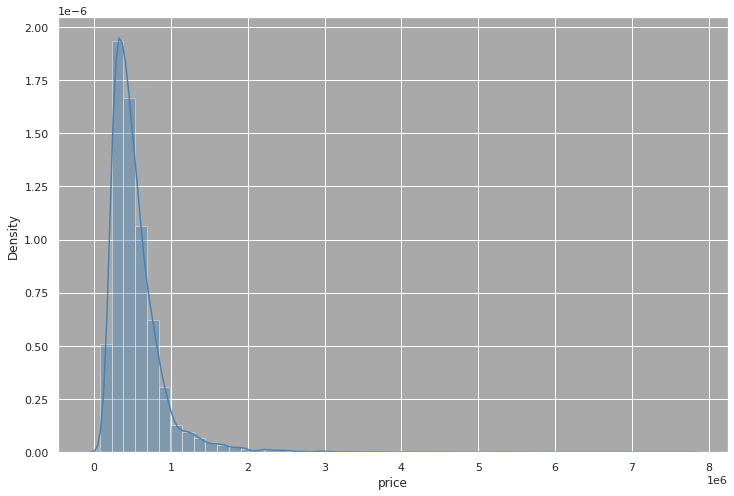

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'], color = 'steelblue')

La mayoría de las casas caen entre 0 y 1.5 millones de dólares, con extremos que llegan a 3 millones.

#### **¿Cuáles son las variables que más correlación guardan con el precio?**

Para responder a esta pregunta, y ser eficientes con nuestro análisis, utilizamos el método .corr().

In [16]:
df.corr()['price'].sort_values()

id              -0.016737
month           -0.009956
year             0.003749
long             0.022092
Unnamed: 0       0.027459
condition        0.036025
yr_built         0.053984
sqft_lot15       0.082837
sqft_lot         0.089882
yr_renovated     0.126415
floors           0.256814
waterfront       0.266437
lat              0.306777
bedrooms         0.308794
sqft_basement    0.323776
view             0.397318
bathrooms        0.525905
sqft_living15    0.585247
sqft_above       0.605371
grade            0.667922
sqft_living      0.701909
price            1.000000
Name: price, dtype: float64

Vamos a visualizar las 3 correlaciones más altas excluyendo la de precio con sí misma. 

##### Precio vs. Metros cuadrados (interior)

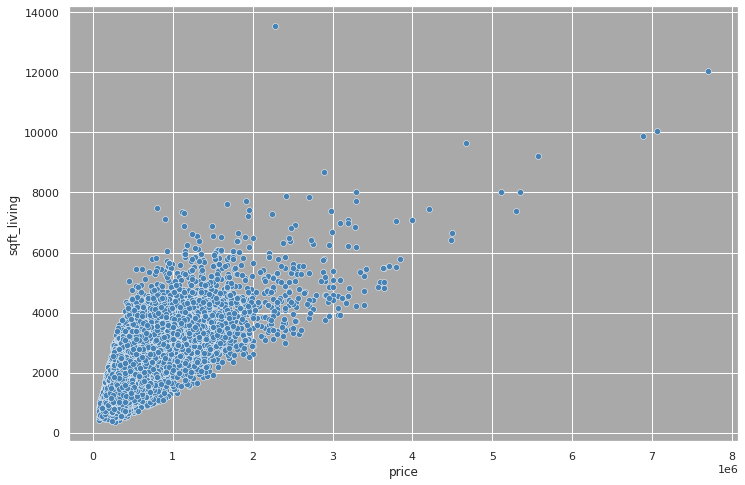

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df, color = 'steelblue')

##### Precio vs. Puntaje construcción, edificación y diseño (1 a 13).

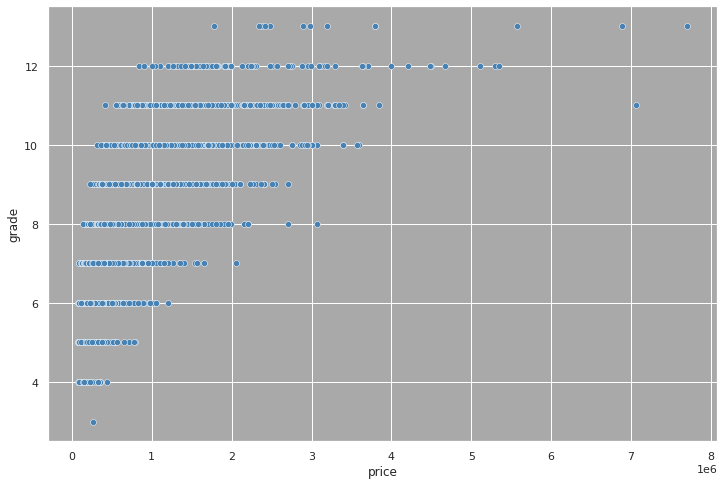

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='grade',data=df, color = 'steelblue')

##### Precio vs. Metros cuadrados sobre el nivel del suelo.

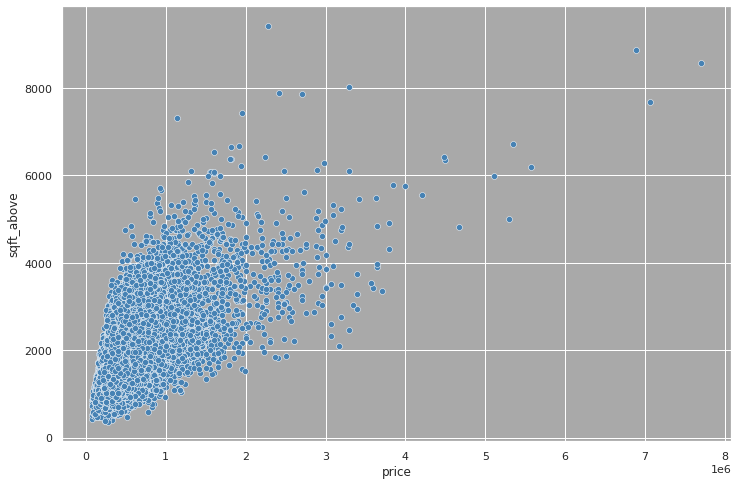

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_above',data=df, color = 'steelblue')

#### **¿Cómo es la distribución de los precios en el tiempo?¿Qué época del año presenta los precios más altos?**

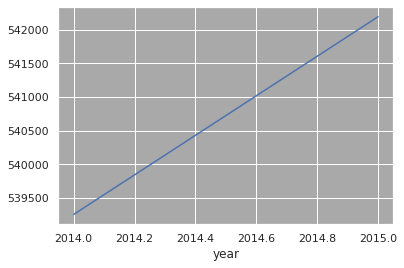

In [20]:
df.groupby('year').mean()['price'].plot()

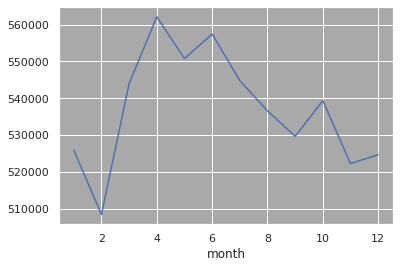

In [21]:
df.groupby('month').mean()['price'].plot()

### **SECCIÓN 2: Visualizaciones Geográficas**
Sacamos provecho al máximo de los datos, utilizando las variables de latitud y longitud para visualizar la distribución geográfica de los datos, buscando tendencias e insights de valor. 

Para esta sección, nos será útil el dataframe donde excluímos el 1% más caro, ya que las referencias visuales serán más claras. 

In [22]:
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [23]:
fig = px.scatter_mapbox(df_99, lat="lat", lon="long",
                      color = 'price', hover_name = 'grade',
                      opacity = 1,
                      zoom=8, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="colab")

In [24]:
fig = px.scatter_mapbox(df_99, lat="lat", lon="long",
                      color = 'price', hover_name = 'sqft_living',
                      opacity = 1,
                      zoom=8, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="colab")

##### ¿Qué tanto más caras son las casas con vista al agua?

A partir de los gráficos geográficos, podemos generar la hipótesis de que aquellas casas con vista al agua son, en promedio, más caras. Los puntos amarillos en el mapa, que representan los valores más altos, se pueden localizar en las orillas. 

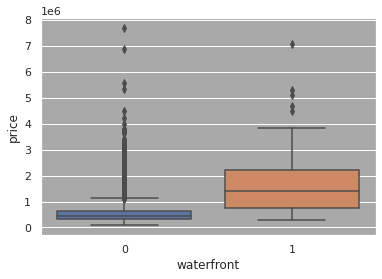

In [25]:
sns.boxplot(x='waterfront',y='price',data=df)

Las casas con vista al agua son, en efecto, más caras. 

## **DEEP LEARNING: CREACIÓN DEL MODELO**
Habiendo realizado las transformaciones pertinentes y las visualizaciones iniciales, es momento de preparar el modelo de deep learning. 



#### Apartamos al precio de las demás variables. 

In [26]:
X = df.drop('price',axis=1)
y = df['price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#### Escalamos

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train= scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [34]:
X_train.shape

(15117, 21)

In [35]:
X_test.shape

(6480, 21)

#### Creación del modelo

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

Cada capa neuronal del modelo va a contener 21 neuronas como rango, ya que 21 es la cantidad de columnas de nuestro dataframe. Vamos a utilizar Adam como método de optimización, y MSE como la medida de pérdida, ya que trabajamos con variables continuas. 

In [41]:
model = Sequential()

model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

#### Entrenamiento del modelo

Dado el tamaño de nuestro dataset, batch_size va a ser 128, y epochs 400, que son parámetros comúnmente utilizados para dataframes de gran tamaño. 

In [42]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 429955579904.0000 - val_loss: 418498052096.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 427042635776.0000 - val_loss: 408342396928.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 387723231232.0000 - val_loss: 321888944128.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 236346277888.0000 - val_loss: 136675950592.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 112681263104.0000 - val_loss: 100216471552.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 102551363584.0000 - val_loss: 98249801728.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 100393345024.0000 - val_loss: 96145088512.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 98315976704.0000 - val_loss: 94096556032.0000
Epoch 9/400
119/119 

Graficamos las pérdidas, esperando que el mismo no tenga un repunte luego de bajar drásticamente, como se espera. 

In [43]:
losses = pd.DataFrame(model.history.history)

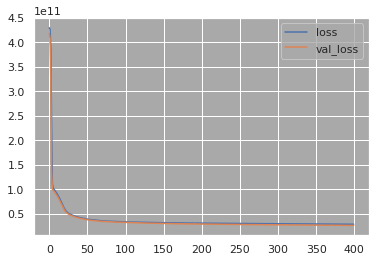

In [44]:
losses.plot()

El gráfico da un diagnóstico óptimo, podemos seguir trabajando. Si el caso no fuese este, habría que considerar estudiar un 'early stopping', que es la solución al 'overfitting' del modelo. 

#### Evaluación del modelo 

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [48]:
predictions = model.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test,predictions))

162100.1442611213

El modelo es bastante consistente, con una varianza explicada de aproximadamente el 80%. No está nada mal, teniendo en cuenta que este modelo es completamente mejorable. 

In [51]:
explained_variance_score(y_test,predictions)

0.8023190289002086

Si comparamos el SQRT de 162100 contra la mediana de los precios de 450000, podemos ser bastante optimistas del rendimiento de nuestro modelo. 

In [53]:
df['price'].median()

450000.0

Podemos graficar nuestros resultados contra una distribución perfecta, para ver en qué rango de precio las predicciones son más acertadas. 

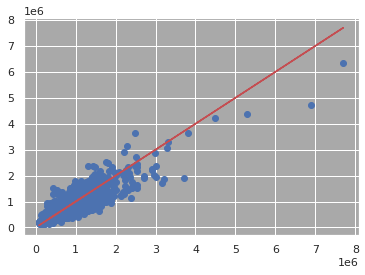

In [54]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

Tal y como indicaba el 80%, para los valores entre 0 y 2 millones de dólares, las predicciones son acertadas, que probablemente engloben dicho porcentaje de varianza explicada. 

In [55]:
errors = y_test.values.reshape(6480, 1) - predictions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



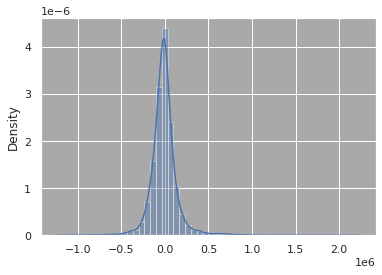

In [56]:
sns.distplot(errors)

## DEEP LEARNING: PREDICCIÓN DE PRECIOS

In [57]:
single_house = df.drop('price',axis=1).iloc[0]

In [60]:
single_house = scaler.transform(single_house.values.reshape(-1, 21))

In [61]:
single_house

array([[0.        , 0.72432505, 0.2       , 0.08      , 0.08376422,
        0.00310751, 0.        , 0.        , 0.        , 0.5       ,
        0.4       , 0.10785619, 0.        , 0.47826087, 0.        ,
        0.57149751, 0.21760797, 0.16193426, 0.00582059, 0.81818182,
        0.        ]])

In [62]:
model.predict(single_house)

array([[280016.78]], dtype=float32)

In [64]:
df.iloc[0]['price']

221900.0

Para una casa con un valor registrado de 221900, nuestro modelo predijo un precio de 280016.78.

Podemos ver con buenos ojos estos resultados, considerando que es un primer intento. Con ajustes al modelo, el error puede reducirse hasta alcanzar un rendimiento óptimo. 